### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Repaet these steps to xG_Shot_Home

#### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = 'C:/Users/hp/desktop/Task 6/Task 6.1'

In [4]:
df = pd.read_csv(os.path.join(path, 'matches_clean.csv'))

In [5]:
df.shape

(744, 17)

In [6]:
df.columns

Index(['Unnamed: 0', 'datetime', 'team1', 'team2', 'team1_code', 'team2_code',
       'round', 'score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away', 'group',
       'matchday'],
      dtype='object')

#### 2. Data cleaning

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.columns

Index(['datetime', 'team1', 'team2', 'team1_code', 'team2_code', 'round',
       'score1', 'score2', 'adj_score1', 'adj_score2', 'xG_Shot_Home',
       'xG_Shot_Away', 'xG_Non-Shot_Home', 'xG_Non-Shot_Away', 'group',
       'matchday'],
      dtype='object')

In [9]:
df.head()

,datetime,team1,team2,team1_code,team2_code,round,score1,score2,adj_score1,adj_score2,xG_Shot_Home,xG_Shot_Away,xG_Non-Shot_Home,xG_Non-Shot_Away,group,matchday
0,2016-09-13 14:45:00+00:00,Barcelona,Celtic,BAR,CEL,g,7,0,6.772,0.00,3.822,0.785,3.875,0.053,C,1.0
1,2016-09-13 14:45:00+00:00,Bayern Munich,Rostov,BMU,ROS,g,5,0,4.737,0.00,3.312,0.209,2.255,0.857,D,1.0
2,2016-09-13 14:45:00+00:00,Dynamo Kiev,Napoli,KIEV,NAP,g,1,2,1.050,2.10,0.459,1.425,0.481,0.644,B,1.0
3,2016-09-13 14:45:00+00:00,Benfica,Besiktas,BEN,BES,g,1,1,1.050,1.05,1.449,0.716,1.169,1.024,B,1.0
4,2016-09-13 14:45:00+00:00,Paris Saint-Germain,Arsenal,PSG,ARS,g,1,1,1.050,1.05,2.592,0.719,1.807,2.302,A,1.0


#### 3. Data prep for regression analysis

 ##### My hypothesis is: adj_score is more efficient than xG_Shot

C:\Users\hp\AppData\Local\Temp\ipykernel_9156\2181773179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a= sns.distplot(df['adj_score2'], bins=25)


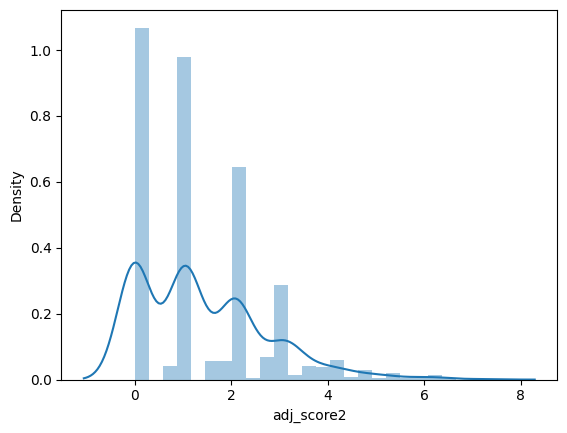

In [10]:
a= sns.distplot(df['adj_score2'], bins=25)

##### The independent variable, x, will be the “score1” variable, 
##### and the dependent variable, y, will be the “adj_score1” variable

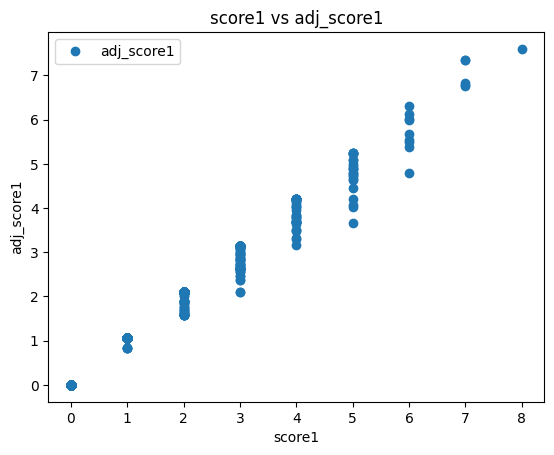

In [11]:
a2= df.plot(x = 'score1', y='adj_score1',style='o') 
plt.title('score1 vs adj_score1')  
plt.xlabel('score1')  
plt.ylabel('adj_score1')  
plt.show()

#### 6) Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [12]:
X = df['score1'].values.reshape(-1,1)
y = df['adj_score1'].values.reshape(-1,1)

In [13]:
X

array([[7],
       [5],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [4],
       [0],
       [0],
       [2],
       [2],
       [1],
       [3],
       [0],
       [4],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [3],
       [4],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [5],
       [0],
       [1],
       [1],
       [0],
       [6],
       [0],
       [2],
       [4],
       [4],
       [0],
       [0],
       [3],
       [1],
       [3],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [1],
       [1],
       [3],
       [4],
       [1],
       [0],
       [0],
       [2],
       [8],
       [1],
       [2],
       [1],
       [3],
       [3],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [1],
       [4],
       [1],
    

##### Split the data into two sets: a training set and a test set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
y_predicted = regression.predict(X_test)

#### 4. Regression analysis

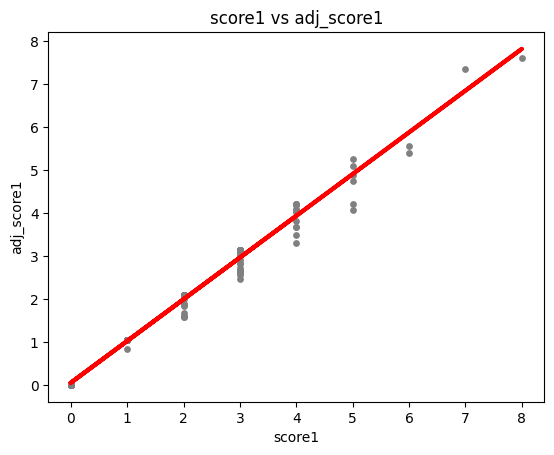

In [18]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('score1 vs adj_score1')
plot_test.xlabel('score1')
plot_test.ylabel('adj_score1')
plot_test.show()

#### Check the model performance statistics—MSE and R2 score.

In [19]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.97072591]]
Mean squared error:  0.02871972466962994
R2 score:  0.9856690794886842


#### Test

In [21]:
y_predicted

array([[3.93442496],
       [1.99297314],
       [1.02224723],
       [1.02224723],
       [1.02224723],
       [0.05152132],
       [1.02224723],
       [0.05152132],
       [1.02224723],
       [1.02224723],
       [2.96369905],
       [1.02224723],
       [1.02224723],
       [2.96369905],
       [5.87587678],
       [0.05152132],
       [2.96369905],
       [1.99297314],
       [0.05152132],
       [1.99297314],
       [1.99297314],
       [1.99297314],
       [1.02224723],
       [0.05152132],
       [1.99297314],
       [2.96369905],
       [4.90515087],
       [1.99297314],
       [0.05152132],
       [2.96369905],
       [1.02224723],
       [2.96369905],
       [1.02224723],
       [4.90515087],
       [0.05152132],
       [1.02224723],
       [1.99297314],
       [1.02224723],
       [0.05152132],
       [1.99297314],
       [1.02224723],
       [1.99297314],
       [1.02224723],
       [4.90515087],
       [1.99297314],
       [1.02224723],
       [3.93442496],
       [1.022

In [22]:
y_predicted_train = regression.predict(X_train)

#### Check the model performance statistics—MSE and R2 score.

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.97072591]]
Mean squared error:  0.03121239515098343
R2 score:  0.9848822310582914


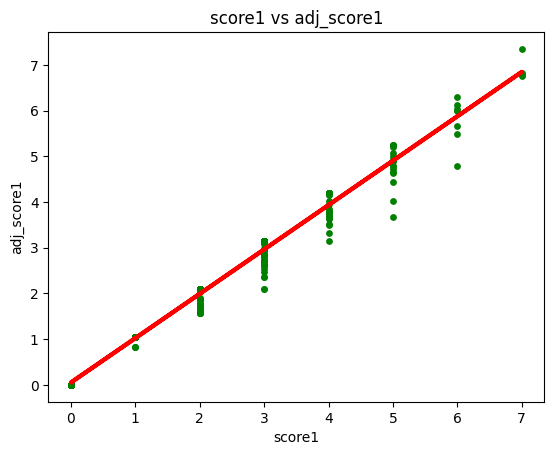

In [25]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('score1 vs adj_score1')
plot_test.xlabel('score1')
plot_test.ylabel('adj_score1')
plot_test.show()

#### Compare the predicted y values with the actual y values in a dataframe.

In [26]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.675,3.934425
1,2.100,1.992973
2,1.050,1.022247
3,1.050,1.022247
4,1.050,1.022247
5,0.000,0.051521
6,1.050,1.022247
7,0.000,0.051521
8,1.050,1.022247
9,1.050,1.022247


#### 5. Repaet these steps to xG_Shot_Home
#### Same steps between score1 and xG_Shot_Home to compare the results with previous one to know if the hypotheses is accurate

C:\Users\hp\AppData\Local\Temp\ipykernel_9156\4219597841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a3= sns.distplot(df['xG_Shot_Home'], bins=25)


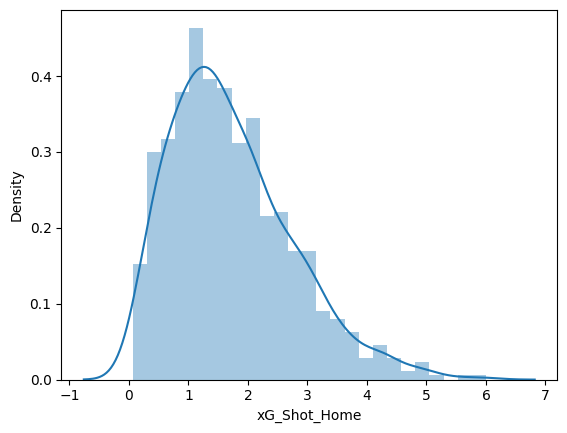

In [11]:
a3= sns.distplot(df['xG_Shot_شص'], bins=25)

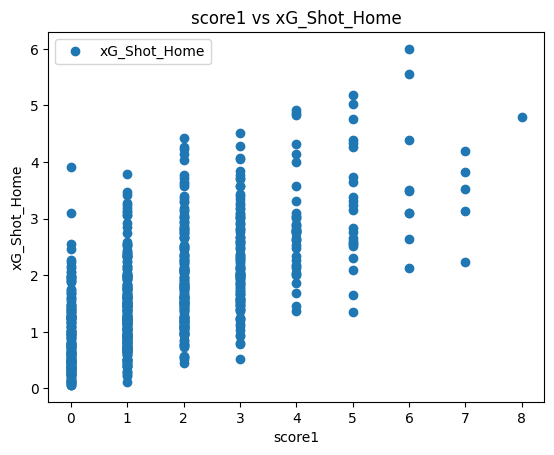

In [29]:
a4=df.plot(x = 'score1', y='xG_Shot_Home',style='o') 
plt.title('score1 vs xG_Shot_Home')  
plt.xlabel('score1')  
plt.ylabel('xG_Shot_Home')  
plt.show()

In [30]:
X_2 = df['score1'].values.reshape(-1,1)
y_2 = df['xG_Shot_Home'].values.reshape(-1,1)

In [31]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
regression.fit(X_2_train, y_2_train)

LinearRegression()

In [33]:
y_2_predicted = regression.predict(X_2_test)

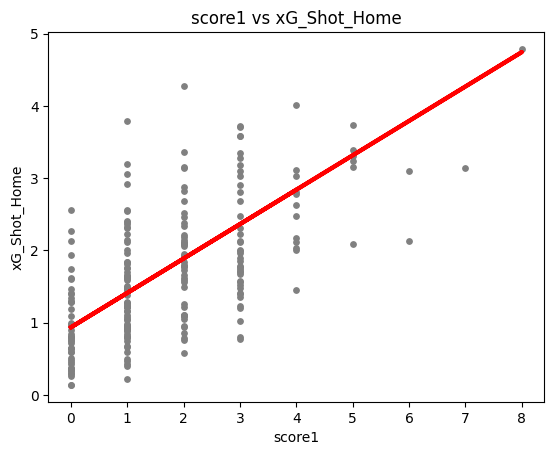

In [34]:
a5=plot_test = plt
plot_test.scatter(X_2_test, y_2_test, color='gray', s = 15)
plot_test.plot(X_2_test, y_2_predicted, color='red', linewidth =3)
plot_test.title('score1 vs xG_Shot_Home')
plot_test.xlabel('score1')
plot_test.ylabel('xG_Shot_Home')
plot_test.show()

In [36]:
rmse_2 = mean_squared_error(y_2_test, y_2_predicted)
r_2_2 = r2_score(y_2_test, y_2_predicted)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r_2_2)

Slope: [[0.47601409]]
Mean squared error:  0.5316730170022609
R2 score:  0.35846906994786987


In [38]:
data_2 = pd.DataFrame({'Actual': y_2_test.flatten(), 'Predicted': y_2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,3.024,2.839518
1,2.220,1.887489
2,0.431,1.411475
3,1.045,1.411475
4,0.816,1.411475
5,0.139,0.935461
6,2.005,1.411475
7,0.725,0.935461
8,0.945,1.411475
9,1.843,1.411475


### Intepretation:

In the two causes the slope is positive, so the relationship is positive. This aligns with my hypothesis that adj_score is more efficient than xG_Shot. but We see that dj_score is more efficient because the Mean squared error is only 0.031 but xG_Shot the different is high and equal 0.53167, so the regression line in adj_score represent most points of the data but xG_Shot contain only 0.53167. Also, the R2 score of adj_score is very high if we comapre to  xG_Shot which is very poor fit so we can say that my hypothesis is accurate